## Numerical Methods Week 7
# Numerical Differentiation and Integration
## Based on Tim Sauer's "Numerical Analysis" (Chapter 5, 5.1-5.2, 5.5)

#### Importing required Python modules

In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt

from IPython.display import Image
import warnings; warnings.simplefilter('ignore')

## 5.1 Numerical Differentiation

### 5.1.1 Finite difference formulas

By definition, the derivative of $f(x)$ at a value $x$ is:

$$f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h},$$

provided that the limit exists. Moreover, Taylor's Theorem says that if $f$ is twice continuously differentiable, then

$$f(x + h) = f(x) + hf'(x) + \frac{h^2}{2} f''(c),$$

where $c$ is between $x$ and $x +h$. This leads to the following important formula for approximating the derivative of $f$ at $x$:

<span style="font-size:large;"><b>Two-point forward-difference formula for the derivative</b>:
    <p/>
<span style="font-size:large;">
$$f'(x) = \frac{f(x + h) - f(x)}{h} - \frac{h}{2} f''(c),$$</span>

<span style="font-size:large;">where $c$ is between $x$ and $x + h$.</span>

Thus, in the two-point forward-difference scheme, the approximate derivative of $f(x)$ at $x$ is:

$$f'_{\textrm{two-point forward-difference approximation}}(x,h) = \frac{f(x + h) - f(x)}{h}$$

and the corresponding error made by this approximation is:

$$f'_{\textrm{two-point forward-difference approximation}}(x,h,c) = - \frac{h}{2} f''(c).$$

Moreover, according to Taylor's Theorem again, if $f$ is three times continuously differentiable, then

$$f(x + h) = f(x) + hf'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6} f'''(c_1)$$

and
$$f(x - h) = f(x) - hf'(x) + \frac{h^2}{2} f''(x) - \frac{h^3}{6} f'''(c_2),$$

where $x - h < c_2 < x < c_1 < x + h$. Subtracting the two equations gives the following second formula for the approximation of the derivative:

<span style="font-size:large;"><b>Three-point centered-difference formula for the derivative</b>:
    <p/>
<span style="font-size:large;">
$$f'(x) = \frac{f(x + h) - f(x - h)}{2h} - \frac{h^2}{6} f''(c),$$</span>

<span style="font-size:large;">where $x - h < c < x + h$.</span>

Thus, in the three-point centered-difference scheme, the approximate derivative of $f(x)$ at $x$ is:

$$f'_{\textrm{three-point centered-difference approximation}}(x,h) = \frac{f(x + h) - f(x - h)}{2h}$$

and the corresponding error made by this approximation is:

$$f'_{\textrm{three-point centered-difference approximation}}(x,h,c) = - \frac{h^2}{6} f''(c).$$

Proceeding similarly we have the following approximation of the second derivative:

<span style="font-size:large;"><b>Three-point centered-difference formula for the second derivative</b>:
    <p/>
<span style="font-size:large;">
$$f''(x) = \frac{f(x - h) - 2f(x) + f(x + h)}{h^2} - \frac{h^2}{12} f^{\textrm{(iv)}}(c),$$</span>

<span style="font-size:large;">for some $c$ between $x - h$ and $x + h$.</span>

In [2]:
def two_point_forward_difference(f,h):
    return (f(x+h)-f(x))/h

def error_two_point_forward_difference(f,h,d2f,c):
    return -h*d2f(c)/2

def three_point_centered_difference(f,h):
    return (f(x+h) - f(x-h))/(2*h)

def error_three_point_centered_difference(f,h,d3f,c):
    return -h**2*d3f(c)/6

### <span style="color:#19bfc2">EXAMPLE 5.1</span>

<span style="font-size:large;">Use the two-point forward-difference formula with $h = 0.1$ to approximate the derivative of $f(x) = \frac{1}{x}$ at $x = 2$.

In [3]:
f = lambda z: 1/z
x = 2
h = 0.1
adf = two_point_forward_difference(f,h)
df = lambda z: -z**(-2)
d2f = lambda z: 2*z**(-3)
print("The approximate derivative of f according to the two-point forward-difference formula is",adf)
print("The error of this approximate derivative of f is",df(x) - adf)
c1 = x
e1=error_two_point_forward_difference(f,h,d2f,c1)
c2 = x + h
e2=error_two_point_forward_difference(f,h,d2f,c2)
print("The error predicted by the formula is between", e1,'and', e2)

The approximate derivative of f according to the two-point forward-difference formula is -0.23809523809523836
The error of this approximate derivative of f is -0.01190476190476164
The error predicted by the formula is between -0.0125 and -0.010797969981643452


### <span style="color:#19bfc2">EXAMPLE 5.2</span>

<span style="font-size:large;">Use the three-point centered-difference formula with $h = 0.1$ to approximate the derivative of $f(x) = \frac{1}{x}$ at $x = 2$.

In [4]:
f = lambda z: 1/z
x = 2
h = 0.1
adf = three_point_centered_difference(f,h)
d3f = lambda z: -6*z**(-4)  
print("The approximate derivative of f according to the three-point centered-difference formula is",adf)
print("The error of this approximate derivative of f is",df(x) - adf)
c1 = x
e1=error_three_point_centered_difference(f,h,d3f,c1)
c2 = x + h
e2=error_three_point_centered_difference(f,h,d3f,c2)
print("The error predicted by the formula is between", e1,'and', e2)

The approximate derivative of f according to the three-point centered-difference formula is -0.2506265664160401
The error of this approximate derivative of f is 0.0006265664160400863
The error predicted by the formula is between 0.0006250000000000001 and 0.0005141890467449263


### 5.1.2 Rounding error

### <span style="color:#19bfc2">EXAMPLE 5.3</span>

<span style="font-size:large;">Approximate the derivative of $f(x) = e^x$ at $x = 0$.

In [5]:
f = lambda z: np.exp(z)
df = f
d2f = f
d3f = f
x = 0
hv=[10**(-i) for i in range(1,10)]
adf1=[two_point_forward_difference(f,h) for h in hv]
adf2=[three_point_centered_difference(f,h) for h in hv]
e1=[f(x)-two_point_forward_difference(f,h) for h in hv]
e2=[f(x)-three_point_centered_difference(f,h) for h in hv]
df=pd.DataFrame(
    {'$h$': hv,
     'Two-point forward-difference formula': adf1,
     'Two-point forward-difference formula error': e1,
     'Three-point centered-difference formula': adf2,
     'Three-point centered-difference formula error': e2
    })
df

,$h$,Two-point forward-difference formula,Two-point forward-difference formula error,Three-point centered-difference formula,Three-point centered-difference formula error
0,1.000000e-01,1.051709,-5.170918e-02,1.001668,-1.667500e-03
1,1.000000e-02,1.005017,-5.016708e-03,1.000017,-1.666675e-05
2,1.000000e-03,1.000500,-5.001667e-04,1.000000,-1.666667e-07
3,1.000000e-04,1.000050,-5.000167e-05,1.000000,-1.666890e-09
4,1.000000e-05,1.000005,-5.000007e-06,1.000000,-1.210232e-11
5,1.000000e-06,1.000000,-4.999622e-07,1.000000,2.675549e-11
6,1.000000e-07,1.000000,-4.943368e-08,1.000000,5.263558e-10
7,1.000000e-08,1.000000,6.077471e-09,1.000000,6.077471e-09
8,1.000000e-09,1.000000,-8.274037e-08,1.000000,-2.722922e-08


The reason that the approximations lose accuracy for very small $h$ is loss of significance. Both formulas subtract nearly equal numbers, lose significant digits, and then, to make matters worse, magnify the effect by dividing by a small number.

### 5.1.3 Extrapolation

Let $F(h)$ be an order $n$ formula for approximating a given quantity $Q$, i.e.,

$$Q \approx F(h) + Kh^n.$$

Then the **Richardson extrapolation** formula for $F(h)$ is:

$$Q \approx \frac{2^n F(h/2) - F(h)}{2^n - 1}.$$

*Examples*:

1. <b>Five-point centered-difference formula for the derivative</b>:
    <p/>

$$f'(x) = \frac{1}{6h}(f(x-h) - 8f(x - h/2) + 8f(x + h/2) - f(x+h)) + O(h^4)$$

2. <b>Five-point centered-difference formula for the second derivative</b>:
    <p/>

$$f''(x) = \frac{1}{3h^2}(f(x-h) + 16f(x - h/2) - 30f(x) + 16f(x + h/2) - f(x+h)) + O(h^4)$$

### 5.1.4 Symbolic differentiation and integration

In [6]:
x = sp.Symbol('x', real=True)
f = sp.sin(3*x)
F = sp.Function('f')(x)
sp.Eq(F,f)

Eq(f(x), sin(3*x))

In [7]:
Fp = sp.Function("f'")(x)
sp.Eq(Fp,f.diff(x))

Eq(f'(x), 3*cos(3*x))

In [8]:
F3p = sp.Function("f'''")(x)
sp.Eq(F3p,f.diff(x,3))

Eq(f'''(x), -27*cos(3*x))

In [9]:
f = sp.sin(x)
t1=sp.Integral(f)
t2=sp.integrate(f,x)
sp.Eq(t1,t2)

Eq(Integral(sin(x), x), -cos(x))

In [10]:
t1=sp.Integral(f,(x,0,sp.pi))
t2=sp.integrate(f,(x,0,sp.pi))
sp.Eq(t1,t2)

Eq(Integral(sin(x), (x, 0, pi)), 2)

In [11]:
f = sp.sin(x)**7
t1=sp.Integral(f)
t2=sp.integrate(f,x)
sp.Eq(t1,t2)

Eq(Integral(sin(x)**7, x), cos(x)**7/7 - 3*cos(x)**5/5 + cos(x)**3 - cos(x))

In [12]:
t2.subs(x,0)

-16/35

In [13]:
t2.subs(x,0).evalf()

-0.457142857142857

## 5.2 Newton-Cotes Formulas for Numerical Integration

### Trapezoid Rule

<span style="font-size:large;">
$$\int_{x_0}^{x_1} f(x) \, dx = \frac{h}{2} (y_0 + y_1) - \frac{h^3}{12} f''(c),$$</span>

<span style="font-size:large;">where $h = x_1 - x_0, y_0 = f(x_0), y_1 = f(x_1)$ and $c$ is between $x_0$ and $x_1$.</span>

###  Simpson's Rule

<span style="font-size:large;">
$$\int_{x_0}^{x_2} f(x) \, dx = \frac{h}{3} (y_0 + 4y_1 + y_2) - \frac{h^5}{90} f^{\textrm{(iv)}}(c),$$</span>

<span style="font-size:large;">where $h = x_2 - x_1 = x_1 - x_0, y_0 = f(x_0), y_1 = f(x_1), y_2 = f(x_2)$ and $c$ is between $x_0$ and $x_2$.</span>

###  Simpson's 3/8 Rule

<span style="font-size:large;">
$$\int_{x_0}^{x_3} f(x) \, dx \approx \frac{3h}{8} (y_0 + 3y_1 + 3y_2 + y_3),$$</span>

<span style="font-size:large;">where $h = x_3 - x_2 = x_2 - x_1 = x_1 - x_0, y_0 = f(x_0), y_1 = f(x_1)$, $y_2 = f(x_2), y_3 = f(x_3)$.</span>

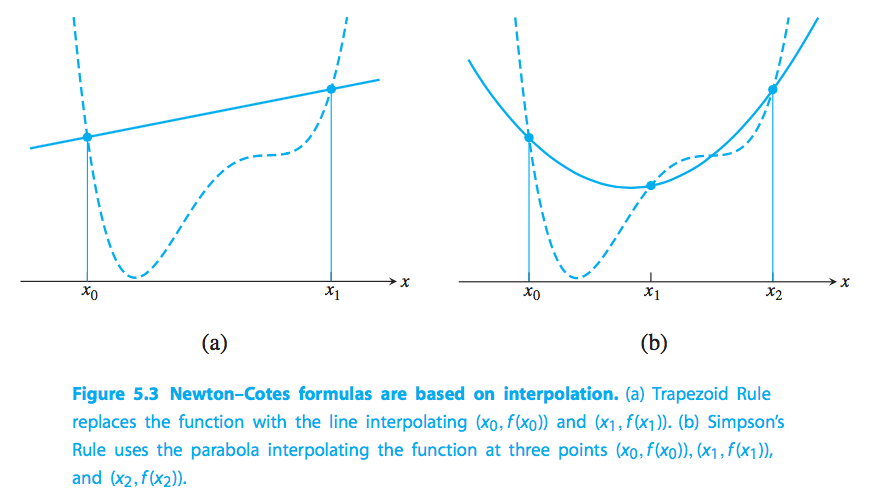

In [14]:
Image(filename='Images/07_1.png')

In [15]:
def trapezoid_rule(f,x0,x1,mf2):
    # f is a sympy function and mf2 is the maximum of f''
    y0=f.subs(x,x0)
    y1=f.subs(x,x1)
    h=x1-x0
    ti=h*(y0+y1)/2
    te=h**3*mf2/12
    return ti, te

def simpson_rule(f,x0,x1,x2,mf4):
    # x0,x1,x2 should be equidistant
    # f is a sympy function and mf4 is the maximum of f''''
    y0=f.subs(x,x0)
    y1=f.subs(x,x1)
    y2=f.subs(x,x2)
    h=x1-x0
    si=h*(y0+4*y1+y2)/3
    se=h**5*mf4/90
    return si, se

### <span style="color:#19bfc2">EXAMPLE 5.6</span>

<span style="font-size:large;">Apply the Trapezoid Rule and Simpson’s Rule to approximate

<span style="font-size:large;">$$\int_1^2 \ln x \, dx$$

<span style="font-size:large;">and find an upper bound for the error in your approximations.

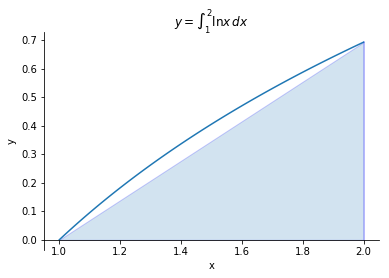

In [16]:
f = lambda x: np.log(x)
x0=1
x1=2
x = np.linspace(x0,x1,100) #p+1)
ti=r'$y = \int_1^2 \ln x \, dx$'
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero') 
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

pl=plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('y') 
plt.title(ti)

y0 = f(x0); y1 = f(x1);
plt.fill_between([x0,x1],[y0,y1],edgecolor='b',alpha=0.2)

plt.plot([x0,x0],[0,y0],'b',alpha=0.2)
plt.plot([x1,x1],[0,y1],'b',alpha=0.2)

# plt.xlim([0.9,2.2]); plt.ylim([0,0.8]);
plt.show()

In [17]:
x = sp.Symbol('x', real=True)
f = sp.ln(x)
x0=1
x1=2
d2f=f.diff(x,2)
mf2=abs(d2f).subs(x,x0)
te,ti=trapezoid_rule(f,x0,x1,mf2)
print("Trapezoid rule approximation is",te.evalf(4))
print("Trapezoid rule magnitude of error is",ti.evalf())
t1=sp.Integral(f,(x,x0,x1))
t2=sp.integrate(f,(x,x0,x1)) 
print("Exact integral is",t2.evalf(6))

Trapezoid rule approximation is 0.3466
Trapezoid rule magnitude of error is 0.0833333333333333
Exact integral is 0.386294


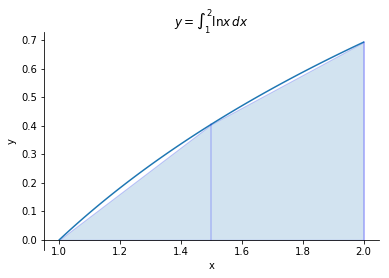

In [18]:
f = lambda x: np.log(x)
x = np.linspace(1,2,100)
x0=1
x1=2
ti=r'$y = \int_1^2 \ln x \, dx$'
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero') 
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
pl=plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('y') 
plt.title(ti)

x0 = 1; x1 = 1.5; x2 = 2
y0 = f(x0); y1 = f(x1); y2 = f(x2)
plt.fill_between([x0,x1,x2],[y0,y1,y2],edgecolor='b',alpha=0.2)

plt.plot([x0,x0],[0,y0],'b',alpha=0.2)
plt.plot([x1,x1],[0,y1],'b',alpha=0.2)
plt.plot([x2,x2],[0,y2],'b',alpha=0.2)

# plt.xlim([0.9,2.2]); plt.ylim([0,0.8]);
plt.show()

In [19]:
x = sp.Symbol('x', real=True)
f = sp.ln(x)
x0=1
x1=1.5
x2=2
d4f=f.diff(x,4)
mf4=abs(d4f).subs(x,x0)
se,si=simpson_rule(f,x0,x1,x2,mf4)
print("Simpson's rule approximation is",se.evalf(4))
print("Simpson's rule magnitude of error is",si.evalf())
t1=sp.Integral(f,(x,x0,x2))
t2=sp.integrate(f,(x,x0,x2)) 
print("Exact integral is",t2.evalf(6))

Simpson's rule approximation is 0.3858
Simpson's rule magnitude of error is 0.00208333333333333
Exact integral is 0.386294


###  5.2.3 Composite Newton-Cotes formulas

The composite Newton-Cotes formulas is simply the sum of the corresponding approximations on adjacent subintervals, called **panels**, formed by a sequence of equidistant points. 

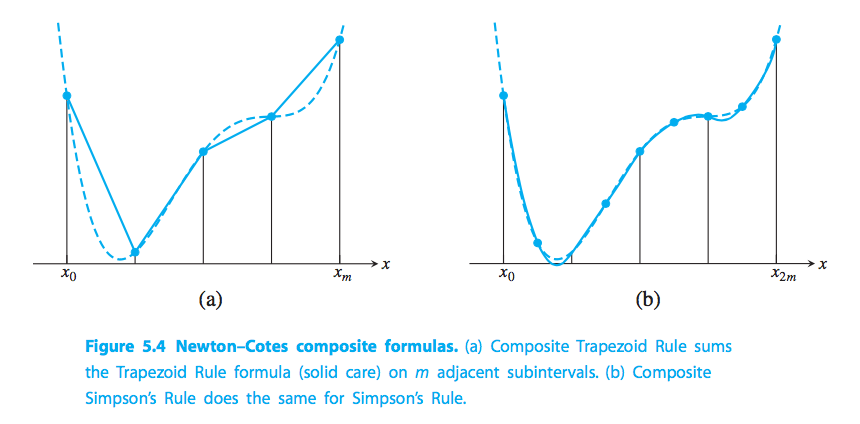

In [20]:
Image(filename='Images/07_2.png')

### Composite Trapezoid Rule

<span style="font-size:large;">
$$\int_a^b f(x) \, dx = \frac{h}{2} \Big(y_0 + y_m + 2 \sum_{i = 1}^{m - 1} y_i\Big) - \frac{(b - a)h^2}{12} f''(c),$$</span>

<span style="font-size:large;">where $x_i = a + ih$ with $h = (b - a)/m, y_i = f(x_i)$, for $i = 0, \ldots, m$ (in particular, $x_0 = a$ and $x_{m} = b$) and $c$ is between $a$ and $b$.</span>

### Composite Simpson's Rule

<span style="font-size:large;">
$$\int_a^b f(x) \, dx = \frac{h}{3} \Big[y_0 + y_{2m} + 
4 \sum_{i = 1}^{m} y_{2i - 1} +
2 \sum_{i = 1}^{m - 1} y_{2i}\Big] - \frac{(b - a)h^4}{180} f^{\textrm{(iv)}}(c),$$</span>

<span style="font-size:large;">where $x_i = a + ih$ with $h = (b - a)/(2m), y_i = f(x_i)$, for $i = 0, \ldots, 2m$ (in particular, $x_0 = a$ and $x_{2m} = b$) and $c$ is between $a$ and $b$.</span>

In [21]:
def composite_trapezoid_rule(f,a,b,p,mf2):
    # f is a sympy function and mf2 is the maximum of f''
    h=(b-a)/p
    X=[]
    Y=[]
    for i in range(p+1):
        X.append(a+i*h)
        Y.append(f.subs(x,a+i*h))
    Z=Y[1:p]
    ti=h*(Y[0]+Y[-1]+2*sum(Z))/2
    te=(b-a)*h**2*mf2/12
    return ti, te

def composite_simpson_rule(f,a,b,p,mf4):
    # [a,b] should be divided in p equidistant panels
    # f is a sympy function and mf4 is the maximum of f''''
    h=(b-a)/(2*p)
    X=[]
    Y=[]
    for i in range(2*p+1):
        X.append(a+i*h)
        Y.append(f.subs(x,a+i*h))
    Z1=Y[1:2*p:2]
    Z2=Y[2:2*p:2]
    si=h*(Y[0]+Y[-1]+4*sum(Z1)+2*sum(Z2))/3
    se=(b-a)*h**4*mf4/180
    return si, se

### <span style="color:#19bfc2">EXAMPLE 5.8</span>

<span style="font-size:large;">Carry out four-panel approximations of

<span style="font-size:large;">$$\int_1^2 \ln x \, dx$$

<span style="font-size:large;">using the composite Trapezoid Rule and composite Simpson’s Rule.

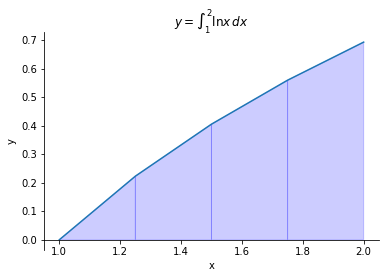

In [22]:
f = lambda x: np.log(x)
a=1
b=2
p=4
x = np.linspace(a,b,p+1)
y = f(x)
ti=r'$y = \int_1^2 \ln x \, dx$'
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero') 
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
pl=plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y') 
plt.title(ti)

for i in range(p):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

# plt.xlim([0.9,2.2]); plt.ylim([0,0.8]);
plt.show()

In [23]:
x = sp.Symbol('x', real=True)
f = sp.ln(x)
a=1
b=2
p=4
d2f=f.diff(x,2)
mf2=abs(d2f).subs(x,a)
te,ti=composite_trapezoid_rule(f,a,b,p,mf2)
print("Composite trapezoid rule approximation is",te.evalf(4))
print("Composite trapezoid rule magnitude of error is",ti.evalf())
t1=sp.Integral(f,(x,a,b))
t2=sp.integrate(f,(x,a,b)) 
print("Exact integral is",t2.evalf(6))

Composite trapezoid rule approximation is 0.3837
Composite trapezoid rule magnitude of error is 0.00520833333333333
Exact integral is 0.386294


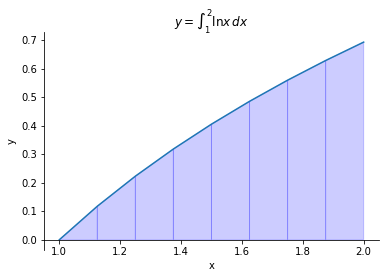

In [24]:
f = lambda x: np.log(x)
a=1
b=2
p=8
x = np.linspace(a,b,p+1)
y = f(x)
ti=r'$y = \int_1^2 \ln x \, dx$'
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero') 
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
pl=plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y') 
plt.title(ti)

for i in range(p):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

# plt.xlim([0.9,2.2]); plt.ylim([0,0.8]);
plt.show()

In [25]:
x = sp.Symbol('x', real=True)
f = sp.ln(x)
a=1
b=2
p=4
d4f=f.diff(x,4)
mf4=abs(d4f).subs(x,a)
se,si=composite_simpson_rule(f,a,b,p,mf4)
print("Composite Simpson's rule approximation is",se.evalf(6))
print("Composite Simpson's rule magnitude of error is",si.evalf())
t1=sp.Integral(f,(x,a,b))
t2=sp.integrate(f,(x,a,b)) 
print("Exact integral is",t2.evalf(6))

Composite Simpson's rule approximation is 0.386292
Composite Simpson's rule magnitude of error is 8.13802083333333e-6
Exact integral is 0.386294


### <span style="color:#19bfc2">EXAMPLE 5.9</span>

<span style="font-size:large;">Find the number of panels $m$ necessary for the composite Simpson’s Rule to approximate
􏰋
<span style="font-size:large;">$$\int_0^\pi \sin^2 \, dx$$
        
<span style="font-size:large;">within six correct decimal places.

In [26]:
x = sp.Symbol('x', real=True)
f = sp.sin(x)**2
a=0
b=sp.pi
d4f=f.diff(x,4)
mf4=abs(d4f).subs(x,a)
mf4
for m in range(1,100):
    si,se=composite_simpson_rule(f,a,b,m,mf4)
    if se.evalf() < 0.5*10**(-6):
        print(m, "panels are sufficient")
        break

37 panels are sufficient


###  5.2.4 Open Newton-Cotes methods

Some integrands that have a removable singularity at an interval endpoint may be more easily handled with an **open Newton–Cotes Method**, which does not use values from the endpoints. 

### Midpoint Rule

<span style="font-size:large;">
$$\int_{x_0}^{x_1} f(x) \, dx = h f(w) + \frac{h^3}{24} f''(c),$$</span>

<span style="font-size:large;">where $h = x_1 - x_0, w$ is the midpoint $x_0 + h/2$ and $c$ is between $x_0$ and $x_1$.</span>

### Composite Midpoint Rule

<span style="font-size:large;">
$$\int_{x_0}^{x_1} f(x) \, dx = h \sum_{i = 1}^m f(w_i) + \frac{(b - a) h^2}{24} f''(c),$$</span>

<span style="font-size:large;">where $h = (b - a)/m$, the $w_i$ are the midpoints of the $m$ equal subintervals of $[a,b]$ and $c$ is between $a$ and $b$.</span>

In [27]:
def midpoint_rule(f,x0,x1,mf2):
    # f is a sympy function and mf2 is the maximum of f''
    y0=f.subs(x,x0)
    y1=f.subs(x,x1)
    h=x1-x0
    w=x0+h/2
    mi=h*f(w)
    me=h**3*mf2/24
    return mi, me

def composite_midpoint_rule(f,a,b,p,mf2):
    # f is a sympy function and mf2 is the maximum of f''
    h=(b-a)/(2*p)
    X=[]
    Y=[]
    for i in range(2*p+1):
        X.append(a+i*h)
        Y.append(f.subs(x,a+i*h))
    Z=Y[1:2*p+1]
    mi=h*sum(Z)
    me=(b-a)*h**2*mf2/24
    return mi, me

### <span style="color:#19bfc2">EXAMPLE 5.10</span>

<span style="font-size:large;">Approximate $\int_0^1 \frac{\sin}{x} \, dx$ by using the Composite Midpoint Rule with $m = 10$ panels.

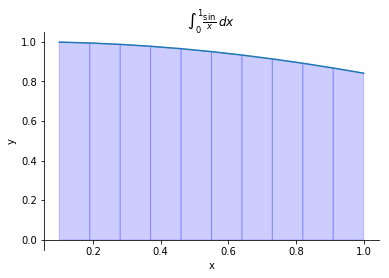

In [28]:
f = lambda x: np.sin(x)/x #sp.sin(x)/x
a=0.1
b=1
p=10
x = np.linspace(a,b,p+1)
y = f(x)
ti=r'$\int_0^1 \frac{\sin}{x} \, dx$'
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero') 
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
pl=plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y') 
plt.title(ti)

for i in range(p):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

# plt.xlim([0.9,2.2]); plt.ylim([0,0.8]);
plt.show()

In [29]:
x = sp.Symbol('x', real=True)
f = sp.sin(x)/x
a=0.01
b=1
p=10
d2f=f.diff(x,2)
mf2=abs(d2f).subs(x,a)
mi,me=composite_midpoint_rule(f,a,b,p,mf2)
mi
print("Composite midpoint rule approximation is",mi.evalf(8))
print("Composite midpoint rule magnitude of error is",me.evalf())
t1=sp.Integral(f,(x,a,b))
t2=sp.integrate(f,(x,a,b)) 
print("Exact integral is",t2.evalf(8))

Composite midpoint rule approximation is 0.93209913
Composite midpoint rule magnitude of error is 3.36899267778294e-5
Exact integral is 0.93608313


## 5.5 Gaussian Quadrature

The set of nonzero functions $\{p_0, \ldots, p_n\}$ on the interval $[a,b]$ is **orthogonal** on $[a,b]$ if

$$(p_i,p_j) = \int_a^b p_j(x) p_k(x) \, dx = \left\{ \begin{array}{ll}
0, & \mbox{ if } j \neq k,\\
\neq 0, & \mbox{ if } j = k \end{array} \right. $$

<span style="font-size:large;">*Theorem*. If $\{p_0, \ldots, p_n\}$ is an orthogonal set of polynomials on the interval $[a,b]$, where $\textrm{deg}\,p_i = i$, then $\{p_0, \ldots, p_n\}$ is a basis for the vector space of degree at most $n$ polynomials on $[a,b]$.
    
<span style="font-size:large;">*Theorem*. If $\{p_0, \ldots, p_n\}$ is an orthogonal set of polynomials on $[a,b]$ and if $\textrm{deg}\,p_i = i$, then $p_i$ has $i$ distinct roots in the interval $(a,b)$.

### <span style="color:#19bfc2">EXAMPLE 5.13</span>

<span style="font-size:large;">Find a set of three orthogonal polynomials on the interval $[−1, 1]$.

Start with $p_0(x) = 1$ and $p_1(x) = x$, since $(p_0,p_1) = \int_{-1}^{1} 1 \cdot x\,dx =0$. Next, take $p_2(x) = x^2 +c$ and find $c$ so that $(p_2,p_0) = 0$, i.e., $\int_{-1}^1 1 \cdot (x^2 + c)\,dx =  $ $2/3 + 2c = 0$, which implies that $c = -1/3$. Moreover, $(p_1,p_2) = \int_{-1}^1 (x^3 - x/3)\,dx = 0$.

### <span style="color:#19bfc2">EXAMPLE 5.14</span>

<span style="font-size:large;">Show that the set of **Legendre polynomials**
    
<span style="font-size:large;">$$p_i(x) = \frac{1}{2^i i!} \frac{d^i}{dx^i} [(x^2 - 1)^i],$$

<span style="font-size:large;">for $0 \leq i \leq n$, is orthogonal on $[-1,1]$.

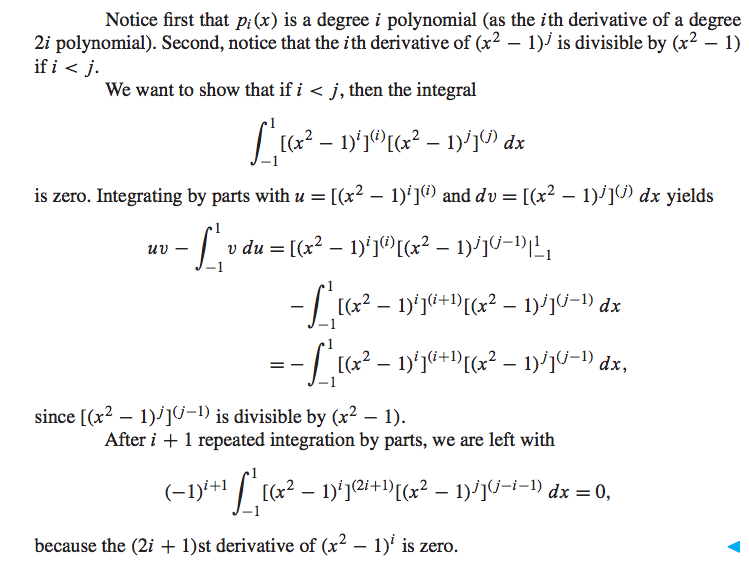

In [30]:
Image(filename='Images/07_3.png')

### Gaussian Quadrature

<span style="font-size:large;">$$\int_{-1}^1 f(x)\,dx \approx \sum_{i = 1}^n c_i f(x_i),$$
    
<span style="font-size:large;">where $x_i, i = 1, \ldots n$, are the roots of the degree $n$ Legendre polynomial and the coefficients $c_i$ are
    
<span style="font-size:large;">$$c_i = \int_{-1}^1 \prod_{k = 1, k \neq i}^n \frac{x - x_i}{x_k - x_i} \, dx, \,\,\, i = 1, \ldots, n.$$

### <span style="color:#19bfc2">EXAMPLE 5.15</span>

<span style="font-size:large;">Approximate the integral
    
<span style="font-size:large;">$$\int_{-1}^1 e^{-\frac{x^2}{2}} \, dx,$$
    
<span style="font-size:large;">using Gaussian Quadrature.

In [34]:
x = sp.Symbol('x', real=True)
f = sp.exp(-x**2/2)
a=-1
b=1

t1=sp.Integral(f,(x,a,b))
t2=sp.integrate(f,(x,a,b)) 
print("Exact integral is",t2.evalf(15))

f = sp.lambdify(x,f,'numpy')
for n in [2,3,4]:
    x,w = np.polynomial.legendre.leggauss(n)
    gauss = sum(w*f(x))
    print("The Gaussian Quadrature approximation for {} is {:.14f}".format(n,gauss))

Exact integral is 1.71124878378430
The Gaussian Quadrature approximation for 2 is 1.69296344978123
The Gaussian Quadrature approximation for 3 is 1.71202024520191
The Gaussian Quadrature approximation for 4 is 1.71122450459949


<span style="font-size:large;">*Theorem*. The Gaussian Quadrature Method, using the degree $n$ Legendre polynomial on $[-1,1]$ has degree of precision $2n - 1$.

<span style="font-size:large;">To approximate integrals on a general interval $[a, b]$, the problem needs to be translated back to $[−1,1]$. Using the substitution $t =$ $(2x − a − b)/(b − a)$, we find it easy to check that

<span style="font-size:large;">$$\int_a^b f(x)\,dx = \int_{-1}^1 f\Big(\frac{(b - a) t + b + a}{2}\Big)\frac{b - a}{2}\,dt.$$

### <span style="color:#19bfc2">EXAMPLE 5.16</span>

<span style="font-size:large;">Approximate the integral
    
<span style="font-size:large;">$$\int_1^2 \ln x \, dx,$$
    
<span style="font-size:large;">using Gaussian Quadrature.

In [33]:
x = sp.Symbol('x', real=True)
f = sp.log(x)
a=1
b=2

t1=sp.Integral(f,(x,a,b))
t2=sp.integrate(f,(x,a,b)) 
print("Exact integral is",t2.evalf(14))

f = sp.lambdify(x,f,'numpy')
for n in [2,3,4]:
    x,w = np.polynomial.legendre.leggauss(n)
    t = ((b - a)*x + b + a)/2
    gauss = sum(w*f(t))*(b - a)/2
    print("The Gaussian Quadrature approximation for {} is {:.14f}".format(n,gauss))

Exact integral is 0.38629436111989
The Gaussian Quadrature approximation for 2 is 0.38659494411674
The Gaussian Quadrature approximation for 3 is 0.38630042158401
The Gaussian Quadrature approximation for 4 is 0.38629449693871
